In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
#convert str to datetime object
#format='%Y%m%d-%H%M%S'
#20210328-200000
#df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)

train['dt_obj'] =pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')
test['dt_obj'] =pd.to_datetime(test['datetime'], format='%Y-%m-%d %H:%M:%S')

# create a new feature
#df['Age Category'] = 'Over 30'
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
train['year'] = train['dt_obj'].dt.year
train['month'] = train['dt_obj'].dt.month
train['day'] = train['dt_obj'].dt.day
train['hour'] = train['dt_obj'].dt.hour
train['min'] = train['dt_obj'].dt.minute
train['second'] = train['dt_obj'].dt.second
train['dayofweek'] = train["dt_obj"].dt.dayofweek

test['year'] = test['dt_obj'].dt.year
test['month'] = test['dt_obj'].dt.month
test['day'] = test['dt_obj'].dt.day
test['hour'] = test['dt_obj'].dt.hour
test['min'] = test['dt_obj'].dt.minute
test['second'] = test['dt_obj'].dt.second
test['dayofweek'] = test["dt_obj"].dt.dayofweek

In [5]:
train['season']=0

#winter
train.loc[train['month'] == 1 , 'season'] = 1
train.loc[train['month'] == 2 , 'season'] = 1
train.loc[train['month'] == 12 , 'season'] = 1
#spring
train.loc[train['month'] == 3 , 'season'] = 2
train.loc[train['month'] == 4 , 'season'] = 2
train.loc[train['month'] == 5 , 'season'] = 2
#summer
train.loc[train['month'] == 6 , 'season'] = 3
train.loc[train['month'] == 7 , 'season'] = 3
train.loc[train['month'] == 8 , 'season'] = 3

#winter
train.loc[train['month'] == 9, 'season'] = 4
train.loc[train['month'] == 10 , 'season'] = 4
train.loc[train['month'] == 11 , 'season'] = 4

test['season']=0
#winter
test.loc[test['month'] == 1 , 'season'] = 1
test.loc[test['month'] == 2 , 'season'] = 1
test.loc[test['month'] == 12 , 'season'] = 1
#spring
test.loc[test['month'] == 3 , 'season'] = 2
test.loc[test['month'] == 4 , 'season'] = 2
test.loc[test['month'] == 5 , 'season'] = 2
#summer
test.loc[test['month'] == 6 , 'season'] = 3
test.loc[test['month'] == 7 , 'season'] = 3
test.loc[test['month'] == 8 , 'season'] = 3

#winter
test.loc[test['month'] == 9, 'season'] = 4
test.loc[test['month'] == 10 , 'season'] = 4
test.loc[test['month'] == 11 , 'season'] = 4

In [6]:
#morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm
#hr_label
train['hr_label']=0
#7-9
train.loc[train['hour'] == 7 , 'hr_label'] = 1
train.loc[train['hour'] == 8 , 'hr_label'] = 1
train.loc[train['hour'] == 9 , 'hr_label'] = 1
#11-13
train.loc[train['hour'] == 11 , 'hr_label'] = 2
train.loc[train['hour'] == 12, 'hr_label'] = 2
train.loc[train['hour'] == 13 , 'hr_label'] = 2
#17-18
train.loc[train['hour'] == 17 , 'hr_label'] = 3
train.loc[train['hour'] == 18 , 'hr_label'] = 3



#morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm
#hr_label
test['hr_label']=0
#7-9
test.loc[test['hour'] == 7 , 'hr_label'] = 1
test.loc[test['hour'] == 8 , 'hr_label'] = 1
test.loc[test['hour'] == 9 , 'hr_label'] = 1
#11-13
test.loc[test['hour'] == 11 , 'hr_label'] = 2
test.loc[test['hour'] == 12, 'hr_label'] = 2
test.loc[test['hour'] == 13 , 'hr_label'] = 2
#17-18
test.loc[test['hour'] == 17 , 'hr_label'] = 3
test.loc[test['hour'] == 18 , 'hr_label'] = 3

In [8]:
test['temp_label']=0
#cold
test.loc[test['temp'] <15  , 'temp_label'] = 1
#mild
test.loc[((test['temp'] >= 15) &( test['temp'] <= 26)), 'temp_label'] = 2
#hot
test.loc[test['temp'] > 26 , 'temp_label'] = 3

train['temp_label']=0
#cold
train.loc[train['temp'] <15  , 'temp_label'] = 1
#mild
train.loc[((train['temp'] >= 15) &( train['temp'] <= 26)), 'temp_label'] = 2
#hot
train.loc[train['temp'] > 26 , 'temp_label'] = 3


In [9]:
train['hum_label']=0
#not-hum
train.loc[train['humidity'] <55  , 'hum_label'] = 1
#hum
train.loc[(train['humidity'] >= 55), 'hum_label'] = 2


test['hum_label']=0
#not-hum
test.loc[test['humidity'] <55  , 'hum_label'] = 1
#hum
test.loc[(test['humidity'] >= 55), 'hum_label'] = 2

In [10]:
test['windspeed']=0
#not-windy
test.loc[test['windspeed'] <20  , 'wind_label'] = 1
#windy
test.loc[(test['windspeed'] >= 20), 'wind_label'] = 2

train['windspeed']=0
#not-windy
train.loc[train['windspeed'] <20  , 'wind_label'] = 1
#windy
train.loc[(train['windspeed'] >= 20), 'wind_label'] = 2

test[test['wind_label'] <= 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dt_obj,...,month,day,hour,min,second,dayofweek,hr_label,temp_label,hum_label,wind_label


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  int64         
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  dt_obj      10886 non-null  datetime64[ns]
 13  year        10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  day         10886 non-null  int64         
 16  hour        10886 non-

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   object        
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   int64         
 9   dt_obj      6493 non-null   datetime64[ns]
 10  year        6493 non-null   int64         
 11  month       6493 non-null   int64         
 12  day         6493 non-null   int64         
 13  hour        6493 non-null   int64         
 14  min         6493 non-null   int64         
 15  second      6493 non-null   int64         
 16  dayofweek   6493 non-nul

In [13]:
train_c=train
train_c = train_c.drop('registered',axis=1)
train_c = train_c.drop('count',axis=1)

train_r=train
train_r = train_r.drop('casual',axis=1)
train_r = train_r.drop('count',axis=1)


In [14]:
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  int64         
 9   casual      10886 non-null  int64         
 10  dt_obj      10886 non-null  datetime64[ns]
 11  year        10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  hour        10886 non-null  int64         
 15  min         10886 non-null  int64         
 16  second      10886 non-

In [15]:
train_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  int64         
 9   registered  10886 non-null  int64         
 10  dt_obj      10886 non-null  datetime64[ns]
 11  year        10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  hour        10886 non-null  int64         
 15  min         10886 non-null  int64         
 16  second      10886 non-

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   object        
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   int64         
 9   dt_obj      6493 non-null   datetime64[ns]
 10  year        6493 non-null   int64         
 11  month       6493 non-null   int64         
 12  day         6493 non-null   int64         
 13  hour        6493 non-null   int64         
 14  min         6493 non-null   int64         
 15  second      6493 non-null   int64         
 16  dayofweek   6493 non-nul

In [17]:
predictor_c = TabularPredictor(label="casual").fit(
    train_data=train_c, time_limit=120, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220830_072131\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220830_072131\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 21
Label Column: casual
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	First 10 (of 309) unique label values:  [3, 8, 5, 0, 2, 1, 12, 26, 29, 47]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Fraction of data from classes with at least 5 examples that will be kept for trai

Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1126, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1083, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, **model_fit_kwargs)
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 587, in fit
    out = self._fit(**kwargs)
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\models\ensemble\stacker_ensemble_model.py", line 154, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\models\ensemble\bagged_ensemble_model.py", line 232, i

In [18]:
y_pred_c = predictor_c.predict(test)

*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L2   0.133649       0.926940  104.602620                0.002993           6.609963            2       True          9
1                 LightGBM\T3   0.126540       0.589689   25.410305                0.589689          25.410305            1       True          3
2  NeuralNetTorch\a9678_00003   0.123697       0.046414   10.891130                0.046414          10.891130            1       True          7
3  NeuralNetTorch\a9678_00001   0.121327       0.072305    9.177335                0.072305           9.177335            1       True          5
4  NeuralNetTorch\a9678_00004   0.118957       0.039926   12.366389                0.039926          12.366389            1       True          8
5  NeuralNetTorch\a9678_00000   0.114218       0.051436   10.2

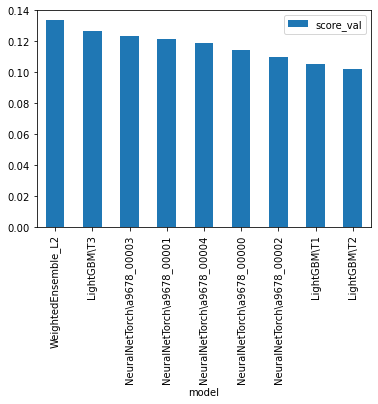

In [59]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

print("AutoGluon infers problem type is: ", predictor_c.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor_c.feature_metadata)

In [68]:
import autogluon.core as ag
from sklearn.model_selection import train_test_split

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 2*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

#metric = 'accuracy' # we specify eval-metric just for demo (unnecessary as it's the default)

train_r_80, train_r_20 = train_test_split(train_r, test_size=0.2, random_state=0)

predictor_r = TabularPredictor(label="registered",problem_type="regression").fit(
    train_r_80, tuning_data=train_r_20, time_limit=time_limit,
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

#problem_type as one of: ['binary', 'multiclass', 'regression'
    
# predictor_r = TabularPredictor(label="registered", eval_metric=metric).fit(
#     train_r_80, tuning_data=train_r_20, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )

No path specified. Models will be saved in: "AutogluonModels/ag-20220830_083704\"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220830_083704\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    8708
Train Data Columns: 21
Tuning Data Rows:    2178
Tuning Data Columns: 21
Label Column: registered
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3575.85 MB
	Train Data (Original)  Memory Usage: 2.57 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 4 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM\T1 ...
	-33.9332	 = Validation score   (-root_mean_squared_error)
	0.35s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T2 ...
	-34.0401	 = Validation score   (-root_mean_squared_error)
	0.33s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T3 ...
	-33.7665	 = Validation score   (-root_mean_squared_error)
	0.44s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T4 ...
	-95.4804	 = Validation score   (-root_mean_squared_error)
	0.35s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T5 ...
	-35.8086	 = Validation score   (-root_mean_squared_error)
	0.37s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch ... Tuning model for up to 53.92s of the 117.68s of remaining time.
Fitted model: NeuralNetTorch\edfe3_00000 ...
	-63.0927	 = Validation score   (-root_mean_squared_error)
	9.38s	 = Training   runtime
	0.04s	 = Validation

In [76]:
train_c_80, train_c_20 = train_test_split(train_c, test_size=0.2, random_state=0)

predictor_c = TabularPredictor(label="casual",problem_type="regression").fit(
    train_c_80, tuning_data=train_c_20, time_limit=time_limit,
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)


No path specified. Models will be saved in: "AutogluonModels/ag-20220830_084042\"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220830_084042\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    8708
Train Data Columns: 21
Tuning Data Rows:    2178
Tuning Data Columns: 21
Label Column: casual
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3802.33 MB
	Train Data (Original)  Memory Usage: 2.57 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 4 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM\T1 ...
	-12.9792	 = Validation score   (-root_mean_squared_error)
	0.3s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T2 ...
	-12.7669	 = Validation score   (-root_mean_squared_error)
	0.31s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T3 ...
	-13.1255	 = Validation score   (-root_mean_squared_error)
	0.43s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T4 ...
	-33.0038	 = Validation score   (-root_mean_squared_error)
	0.32s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T5 ...
	-13.723	 = Validation score   (-root_mean_squared_error)
	0.36s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch ... Tuning model for up to 53.92s of the 117.83s of remaining time.
Fitted model: NeuralNetTorch\6fdd9_00000 ...
	-24.0605	 = Validation score   (-root_mean_squared_error)
	10.48s	 = Training   runtime
	0.06s	 = Validation 

In [47]:
train_r_20.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,year,month,day,hour,min,second,dayofweek,hr_label,temp_label,hum_label,wind_label
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.0,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.0,2178.0,2178.000000,2178.000000,2178.000000,2178.000000,2178.0
mean,2.548209,0.024793,0.685032,1.438476,20.547815,24.010831,62.316804,0.0,157.892562,2011.504591,6.628099,10.002296,11.493572,0.0,0.0,2.980257,0.619835,2.001377,1.634527,1.0
std,1.116839,0.155531,0.464610,0.653690,7.861188,8.520853,19.418527,0.0,151.718644,0.500094,3.406252,5.410099,6.842825,0.0,0.0,2.005522,0.973518,0.769479,0.481673,0.0
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.0,0.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.0
25%,2.000000,0.000000,0.000000,1.000000,13.940000,17.425000,47.000000,0.0,36.250000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000,0.000000,1.000000,1.000000,1.0
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,62.000000,0.0,124.000000,2012.000000,7.000000,10.000000,11.000000,0.0,0.0,3.000000,0.000000,2.000000,2.000000,1.0
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,78.000000,0.0,222.000000,2012.000000,10.000000,15.000000,17.000000,0.0,0.0,5.000000,1.000000,3.000000,2.000000,1.0
max,4.000000,1.000000,1.000000,3.000000,39.360000,43.940000,100.000000,0.0,812.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000,3.000000,3.000000,2.000000,1.0


In [41]:
train_r.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,year,month,day,hour,min,second,dayofweek,hr_label,temp_label,hum_label,wind_label
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.0,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000,10886.000000,10886.000000,10886.000000,10886.0
mean,2.505328,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,0.0,155.552177,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,3.013963,0.627871,1.972625,1.621808,1.0
std,1.116839,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,0.0,151.039033,0.500019,3.444373,5.476608,6.915838,0.0,0.0,2.004585,0.993757,0.771557,0.484958,0.0
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.0,0.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.0
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,0.0,36.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000,0.000000,1.000000,1.000000,1.0
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,0.0,118.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000,0.000000,2.000000,2.000000,1.0
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,0.0,222.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,5.000000,1.000000,3.000000,2.000000,1.0
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,0.0,886.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000,3.000000,3.000000,2.000000,1.0


In [ ]:

predictor_r = TabularPredictor(label="registered").fit(
    train_data=train_r, time_limit=120, presets="best_quality"
)

In [69]:
y_pred_r = predictor_r.predict(test)


In [77]:
y_pred_c = predictor_c.predict(test)

*** Summary of fit() ***
Estimated performance of each model:
                         model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0          WeightedEnsemble_L2  -33.301842       0.080686   9.562606                0.000996           0.242906            2       True         11
1                  LightGBM\T3  -33.766456       0.005983   0.421446                0.005983           0.421446            1       True          3
2                  LightGBM\T1  -33.933221       0.006980   0.278269                0.006980           0.278269            1       True          1
3                  LightGBM\T2  -34.040135       0.006377   0.331294                0.006377           0.331294            1       True          2
4                  LightGBM\T5  -35.808617       0.011969   0.340490                0.011969           0.340490            1       True          5
5   NeuralNetTorch\e3e9e_00001  -54.390105       0.06035

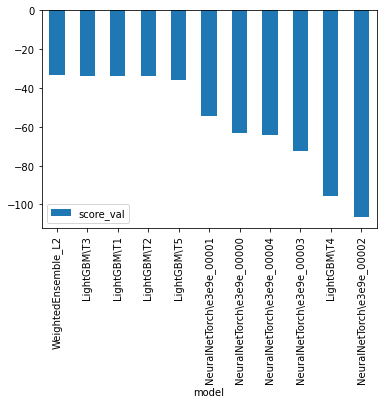

In [51]:
predictor_r.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

print("AutoGluon infers problem type is: ", predictor_c.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor_r.feature_metadata)

In [79]:
result = pd.concat([y_pred_r, y_pred_c], axis=1, join='inner')

result['count']=(round(result['registered'])+result['casual']).astype('int')

result=result.drop("registered",axis=1)

result=result.drop("casual",axis=1)

result['datetime']=test['datetime']

result[result['count'] < 0]



result.loc[result['count'] < 0 , 'count'] = 0

submission=result

submission.to_csv("submission.csv", index=False)

import json
kaggle_username = "kanericaws"
kaggle_key = "9c72a930e84f7c1845fbc803dc7adfdc"

!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "second submission with feature enginnering"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/156k [00:00<?, ?B/s]
  5%|5         | 8.00k/156k [00:00<00:02, 53.4kB/s]
 77%|#######6  | 120k/156k [00:00<00:00, 580kB/s]  
100%|##########| 156k/156k [00:01<00:00, 138kB/s]
